In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("TCS.csv", parse_dates=["Date"], index_col="Date")
df = df.sort_index()  
df = df['Close']

In [5]:
df = df.asfreq('D').ffill() 

In [6]:
result = adfuller(df)
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

if result[1] > 0.05:
    print("The data is not stationary. Differencing is applied.")
    df_diff = df.diff().dropna()  
else:
    print("The data is already stationary.")
    df_diff = df

ADF Statistic: -1.6435
p-value: 0.4604
The data is not stationary. Differencing is applied.


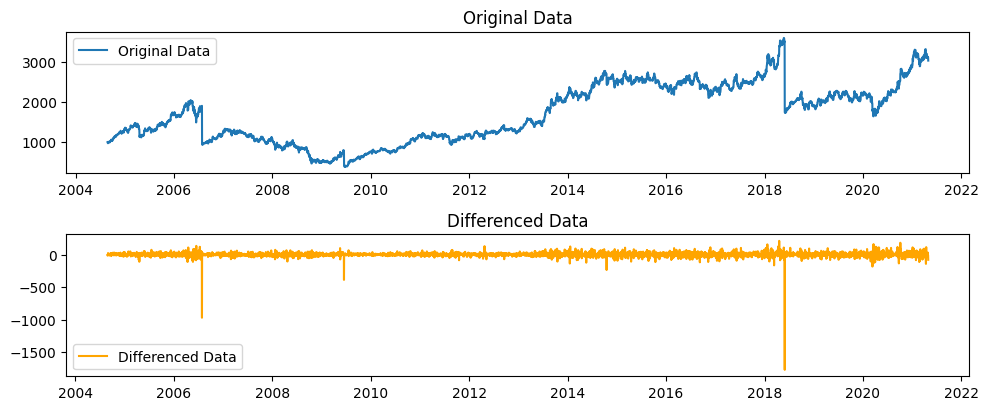

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(df, label='Original Data')
plt.title("Original Data")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_diff, label='Differenced Data', color='orange')
plt.title("Differenced Data")
plt.legend()

plt.tight_layout()
plt.show()


Plotting ACF and PACF...


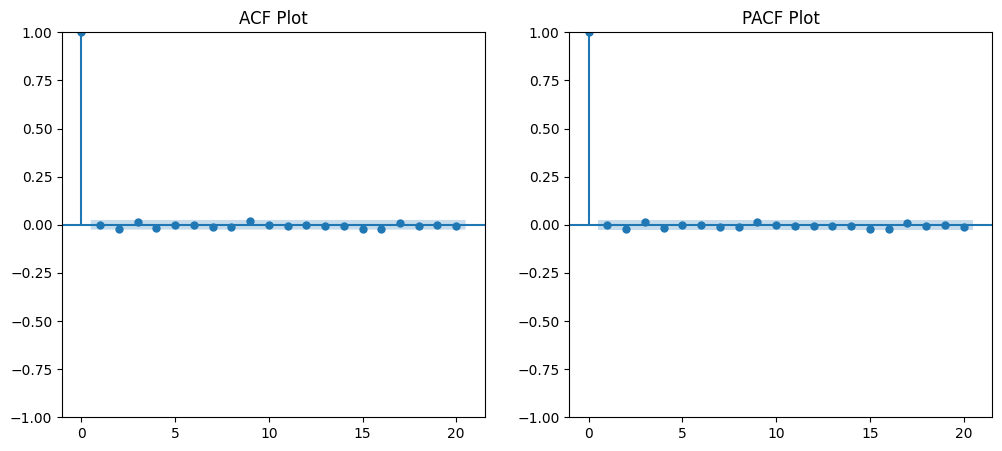

In [8]:
print("Plotting ACF and PACF...")
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df_diff, ax=ax[0], lags=20)
ax[0].set_title("ACF Plot")
plot_pacf(df_diff, ax=ax[1], lags=20)
ax[1].set_title("PACF Plot")
plt.show()

In [9]:
train = df[:'2019']
test = df['2020':]

In [10]:
p, d, q = 1, 1, 1  
print(f"Building ARIMA model with order (p, d, q): ({p}, {d}, {q})")
model = ARIMA(train, order=(p, d, q))
model_fit=model.fit()

Building ARIMA model with order (p, d, q): (1, 1, 1)


In [11]:
forecast = model_fit.forecast(steps=len(test))
test_predictions = pd.Series(forecast, index=test.index)

In [12]:
rmse = np.sqrt(mean_squared_error(test, test_predictions))
print(f"RMSE: {rmse}")

RMSE: 567.3317687650779


In [13]:
rmse = np.sqrt(mean_squared_error(test, test_predictions))
print(f"RMSE: {rmse:.4f}")

RMSE: 567.3318


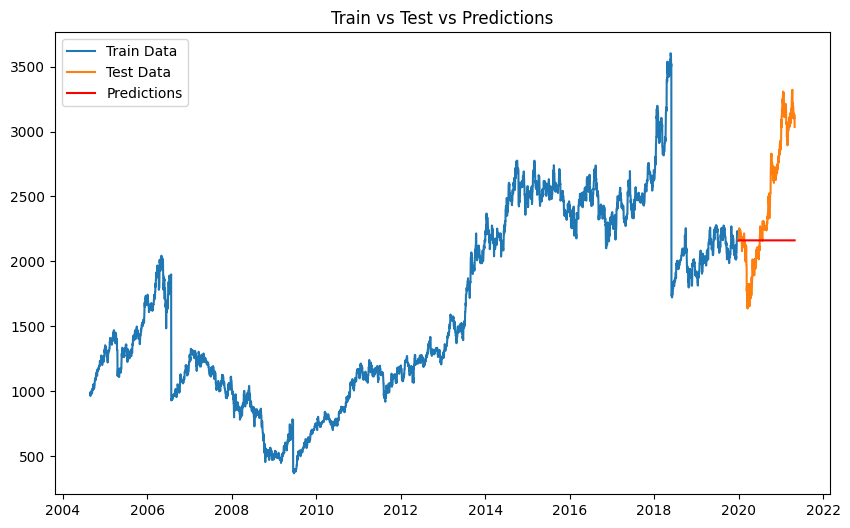

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(train, label="Train Data")
plt.plot(test, label="Test Data")
plt.plot(test_predictions, label="Predictions", color='red')
plt.title("Train vs Test vs Predictions")
plt.legend()
plt.show()